In [ ]:
import pandas as pd

file_path='../data/accepted_2007_to_2018Q4.csv'
df=pd.read_csv(file_path)
df.info()


In [4]:
object_col=df.select_dtypes(include='object').columns.to_list()
rest_col=df.select_dtypes(exclude='object').columns.to_list()

In [5]:
logical_drop = ['id', 'url', 'desc', 'emp_title', 'title', 'zip_code', 'verification_status_joint', 'sec_app_earliest_cr_line']
object_logical_drop=[col for col in logical_drop if col in object_col]
object_col_with_hight_null=[col for col in object_col if df[col].isna().mean() > 0.5 ]
object_col_with_hight_null
object_drops=set(object_logical_drop+object_col_with_hight_null)

# Object to process
object_to_process = [col for col in object_col if col not in object_drops]

In [6]:
binary=[col for col in object_to_process if (col=='pymnt_plan' or col=='hardship_flag' or col=='debt_settlement_flag')]
categorical1=[col for col in object_to_process if (col=='term' or col=='initial_list_status' or col=='application_type' or col=='disbursement_method')]
date=[col for col in object_to_process if col in ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']]
categorical2=[col for col in object_to_process if(col not in binary and col not in categorical1 and col not in date)]

In [7]:
for col in binary:
    df[col].fillna(df[col].mode()[0],inplace=True)
    if col==binary[0]:
        df[col]=df[col].map({'n':0,'y':1})
    else:
        df[col]=df[col].map({'N':0,'Y':1})


In [8]:
for col in date:
    df[col]=pd.to_datetime(df[col],format='%b-%Y')

In [9]:
df['issue_year']=df['issue_d'].dt.year
df['issue_month']=df['issue_d'].dt.month
df['credit_history_months']=(df['issue_d']-df['earliest_cr_line']).dt.days // 30
df['last_pymnt_month']=df['last_pymnt_d'].dt.month
df['last_pymnt_year']=df['last_pymnt_d'].dt.year
df['last_credit_pull_year']=df['last_credit_pull_d'].dt.year
df['last_credit_pull_month']=df['last_credit_pull_d'].dt.month

In [10]:
df.drop(columns=date,inplace=True)

In [11]:
for col in categorical1:
    print(f"{df[col].unique()}, this list  has {df[col].isna().sum()} nan values")

[' 36 months' ' 60 months' nan], this list  has 33 nan values
['w' 'f' nan], this list  has 33 nan values
['Individual' 'Joint App' nan], this list  has 33 nan values
['Cash' nan 'DirectPay'], this list  has 33 nan values


In [12]:
for col in categorical1:
    df[col].fillna(df[col].mode()[0],inplace=True)
    list_mapping=df[col].unique().tolist()
    if len(list_mapping)==2:
        df[col]=df[col].map({list_mapping[0]:0,list_mapping[1]:1})
    else:
        print(f'{col} has more than two attributes')

In [ ]:
for col in categorical1:
    print(f"{df[col].unique()}, this list  has {df[col].isna().sum()} nan values")

[0 1], this list  has 0 nan values
[0 1], this list  has 0 nan values
[0 1], this list  has 0 nan values
[0 1], this list  has 0 nan values


In [14]:
for col in categorical2:
    df[col].fillna(df[col].mode()[0],inplace=True)

In [ ]:
for col in categorical2:
    print(f"{col}, this list  has {df[col].isna().sum()} nan values")

grade, this list  has 0 nan values
sub_grade, this list  has 0 nan values
emp_length, this list  has 0 nan values
home_ownership, this list  has 0 nan values
verification_status, this list  has 0 nan values
loan_status, this list  has 0 nan values
purpose, this list  has 0 nan values
addr_state, this list  has 0 nan values


In [16]:
grade_mapping={'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6}
df['grade']=df['grade'].map(grade_mapping)

In [17]:
grades = ['A','B','C','D','E','F','G']
sub_grades=[f'{g}{i}' for g in grades for i in range(1,6)]
sub_grades_map={sg:i for i,sg in enumerate(sub_grades)}
df['sub_grade'] = df['sub_grade'].map(sub_grades_map)

In [18]:
df['emp_length'].unique()

array(['10+ years', '3 years', '4 years', '6 years', '1 year', '7 years',
       '8 years', '5 years', '2 years', '9 years', '< 1 year'],
      dtype=object)

In [19]:
emp_map = {
    '< 1 year': 0,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10
}
df['emp_length']=df['emp_length'].map(emp_map)

In [20]:

df['home_ownership'].unique()

array(['MORTGAGE', 'RENT', 'OWN', 'ANY', 'NONE', 'OTHER'], dtype=object)

In [21]:
home_owner_map={
    'NONE': 0,
    'OWN': 1,
    'RENT': 2,
    'MORTGAGE': 3,
    'ANY': 4,
    'OTHER': 5
}
df['home_ownership']=df['home_ownership'].map(home_owner_map)

In [22]:
verification_status_map={'Not Verified':0,'Source Verified':1,'Verified':2}
df['verification_status']=df['verification_status'].map(verification_status_map)

In [23]:
loan_status_map = {
    'Fully Paid': 0,
    'Does not meet the credit policy. Status:Fully Paid': 0,
    'Current': 0,
    'In Grace Period': 0,
    'Late (16-30 days)': 1,
    'Late (31-120 days)': 1,
    'Charged Off': 2,
    'Default': 2,
    'Does not meet the credit policy. Status:Charged Off': 2
}
df['loan_status']=df['loan_status'].map(loan_status_map)

In [24]:
purposes=sorted(df['purpose'].unique())
purposes_map={p:i for i,p in enumerate(purposes)}
df['purpose']=df['purpose'].map(purposes_map)

In [25]:
df['addr_state'].unique()

array(['PA', 'SD', 'IL', 'NJ', 'GA', 'MN', 'SC', 'RI', 'TX', 'NC', 'CA',
       'VA', 'AZ', 'NY', 'IN', 'MD', 'KS', 'NM', 'AL', 'WA', 'MO', 'OH',
       'LA', 'FL', 'CO', 'MI', 'TN', 'DC', 'MA', 'WI', 'HI', 'VT', 'DE',
       'NH', 'NE', 'CT', 'OR', 'AR', 'MT', 'NV', 'WV', 'WY', 'OK', 'KY',
       'MS', 'ME', 'UT', 'ND', 'AK', 'ID', 'IA'], dtype=object)

In [26]:
address_stat=sorted(df['addr_state'].unique())
address_stat_map={addr:i for i,addr in enumerate(address_stat)}
df['addr_state']=df['addr_state'].map(address_stat_map)

In [35]:

object_drops1 = [item for item in object_drops if item in df.columns]
# Drop any other high‑null columns that still exist in df
existing_high_null = [col for col in object_drops1 if col in df.columns ]
df.drop(columns=existing_high_null, inplace=True)


In [ ]:
# we drop unnecessairy dolumns 
df.drop(columns=['id', 'emp_title', 'url', 'title', 'zip_code'], inplace=True)

In [ ]:
for col in df.columns:
    if df[col].isna().any():
        df[col].fillna(df[col].median(), inplace=True)

print(df.isna().sum().sum())  

0


# binary and Non_binary columns:

after cleaning all the data dropping the high null columns and transforming object columns it is time to categorize the remaining one´s two twp categories :
## Binary :
there is no need to apply on them PCA

## Non_binary :
those ones will apply on them PCA sparse.


In [ ]:
binary=[col for col in df.columns if set(df[col].unique()).issubset({0,1})]
non_binary=[col for col in df.columns if col not in binary]


In [ ]:
# instaling scikit_learn library 
%pip install scikit_learn

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaled_data=scaler.fit_transform(df[non_binary])
df_scaled_data=pd.DataFrame(scaled_data,columns=non_binary,index=df.index)
df_scaled=pd.concat([df[binary],df_scaled_data],axis=1)

# Project Phase 2: Dimensionality Reduction & Segmentation via Sparse PCA
Objective
Transform the 134 scaled numeric features into a smaller set of interpretable, sparse components that capture the latent risk and behavioral profiles of borrowers.

### Why Sparse PCA?
Standard PCA creates dense components where every feature contributes, making interpretation difficult.

Sparse PCA forces many loadings to zero, resulting in components that are dominated by a few key features—ideal for business storytelling.

Immediate Steps
1. Fit Sparse PCA
Input: Scaled DataFrame df_scaled (shape: (n_samples, 134))

Parameters: Start with n_components=10, alpha=0.5 (sparsity tuning).

Output: Transformed matrix X_spca (shape: (n_samples, 10)).

2. Evaluate Components
Sparsity: Check how many loadings per component are non‑zero.

Explained Variance: Compute manually (if needed) to decide if 10 components are sufficient.

Loadings Analysis: Examine the top‑weighted features in each component to assign business meaning (e.g., "Component 1: High Debt‑to‑Income & Low Credit Score").

3. Determine Optimal Number of Components
Iterate over different n_components (e.g., 5‑30).

Plot explained variance vs. components (elbow method).

Balance: Enough components to capture signal, few enough to remain interpretable.

4. Interpret & Label Components
For each selected component, list the top 5‑10 features with highest absolute loadings.

Assign a descriptive segment label (e.g., "Young Borrower with Short Credit History", "Highly Leveraged Debt Consolidator").

5. Prepare for Visualization (Next Phase – R)
Export X_spca (component scores) and spca.components_ (loadings) to CSV.

In R, create:

Biplot of first two components.

t‑SNE/UMAP 2D projection colored by component scores or original loan status.

Heatmap of component loadings for interpretation.

### Success Criteria
Components are sparse (each tied to a clear subset of features).

Components explain >70‑80% cumulative variance.

Each component receives a clear, business‑relevant label.



In [ ]:
df_sampled = df_scaled.sample(n=200000, random_state=42)
print(df_sampled.shape)  

(200000, 134)


In [ ]:
from sklearn.decomposition import SparsePCA

n_components = 10
spca = SparsePCA(n_components=n_components, random_state=42, alpha=10)
X_spca = spca.fit_transform(df_sampled)

print("Sparse PCA shape:", X_spca.shape)  

In [50]:
components = spca.components_
n_nonzero = (components != 0).sum(axis=1)
print("Non‑zero loadings per component:", n_nonzero)

Non‑zero loadings per component: [58 70 69 63 72 74 14 51 33  7]


In [54]:
import numpy as np

for i in [6, 9]:  # Components with 14 and 7 non‑zeros
    print(f"\n--- Component {i} ---")
    comp = spca.components_[i]
    # Top 5 absolute loadings
    top_idx = np.argsort(np.abs(comp))[-5:]
    for idx in top_idx:
        feat = df_scaled.columns[idx]
        print(f"{feat}: {comp[idx]:.4f}")


--- Component 6 ---
sec_app_open_acc: -0.1808
sec_app_fico_range_high: -0.3413
sec_app_fico_range_low: -0.3413
sec_app_chargeoff_within_12_mths: 0.5379
sec_app_collections_12_mths_ex_med: 0.5673

--- Component 9 ---
total_rec_late_fee: 0.0358
hardship_last_payment_amount: 0.3589
orig_projected_additional_accrued_interest: 0.5264
hardship_payoff_balance_amount: 0.5402
hardship_amount: 0.5486


# Interpretation:

. Component 6 is dominated by secondary applicant features (sec_app_*). This likely captures joint‑application risk (applications with a co‑borrower).

. Component 9 is dominated by hardship‑related amounts (hardship_*, orig_projected_*). This captures borrowers who entered hardship programs.

In [56]:
X_full_sparse = spca.transform(df_scaled)
print("Full dataset transformed shape:", X_full_sparse.shape)

Full dataset transformed shape: (2260701, 10)


In [57]:
from sklearn.metrics import mean_squared_error
# Reconstruct the original data from the sparse components
X_reconstructed = X_full_sparse @ spca.components_
mse = mean_squared_error(df_scaled, X_reconstructed)
print("Reconstruction MSE:", mse)

Reconstruction MSE: 0.5551877563460341


In [60]:
for i in range(10):
    if i in [6, 9]:
        continue 
    print(f"\n--- Component {i} ---")
    comp = spca.components_[i]
    top_idx = np.argsort(np.abs(comp))[-5:]
    for idx in top_idx:
        feat = df_scaled.columns[idx]
        print(f"{feat}: {comp[idx]:.4f}")


--- Component 0 ---
num_actv_bc_tl: 0.2867
num_bc_sats: 0.2915
num_rev_tl_bal_gt_0: 0.3052
num_actv_rev_tl: 0.3068
num_op_rev_tl: 0.3199

--- Component 1 ---
open_acc_6m: -0.2378
open_rv_24m: -0.2430
open_rv_12m: -0.2516
acc_open_past_24mths: -0.2632
num_tl_op_past_12m: -0.2877

--- Component 2 ---
percent_bc_gt_75: -0.2777
revol_util: -0.2940
bc_util: -0.3079
fico_range_low: 0.3318
fico_range_high: 0.3318

--- Component 3 ---
open_act_il: 0.2530
num_il_tl: 0.2899
total_bal_ex_mort: 0.3097
total_bal_il: 0.3115
total_il_high_credit_limit: 0.3236

--- Component 4 ---
total_rec_prncp: -0.2768
last_pymnt_year: 0.3344
issue_year: 0.3495
out_prncp_inv: 0.3577
out_prncp: 0.3577

--- Component 5 ---
total_pymnt_inv: 0.2946
installment: 0.3455
funded_amnt_inv: 0.3618
loan_amnt: 0.3619
funded_amnt: 0.3619

--- Component 7 ---
mths_since_last_major_derog: -0.3689
mths_since_recent_bc_dlq: -0.3704
mths_since_recent_revol_delinq: -0.4081
delinq_2yrs: 0.4231
mths_since_last_delinq: -0.4293

--- Com

In [72]:

df_scaled.to_csv('../data/scaled_features.csv', index=False)
np.save('../data/sparse_pca_scores.npy', X_full_sparse)
np.save('../data/sparse_pca_components.npy', spca.components_)

In [62]:
from sklearn.metrics import mean_squared_error

X_reconstructed = X_full_sparse @ spca.components_
mse = mean_squared_error(df_scaled, X_reconstructed)
explained_variance = 1 - mse / df_scaled.var().mean()
print(f"Explained variance by 10 sparse components: {explained_variance:.3f}")


Explained variance by 10 sparse components: 0.403


In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import SparsePCA
import matplotlib.pyplot as plt
import seaborn as sns

df_scaled = pd.read_csv('../data/scaled_features.csv')
X_full_sparse = np.load('../data/sparse_pca_scores.npy')
components = np.load('../data/sparse_pca_components.npy')

Fontconfig warning: ignoring UTF-8: not a valid region tag


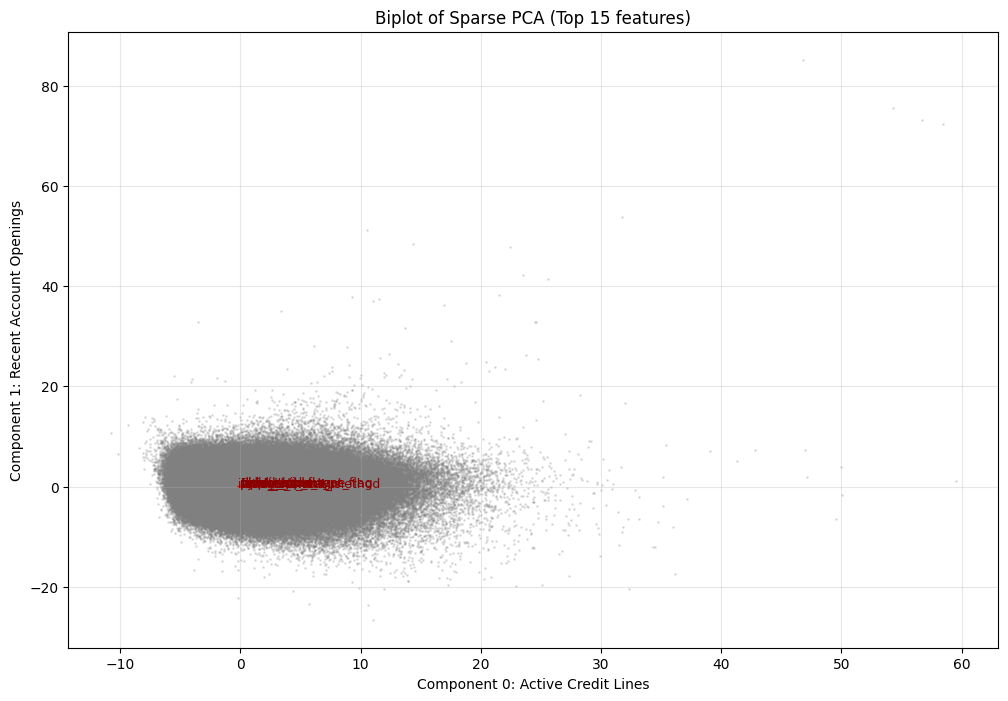

In [5]:
# Scale loadings for arrow length
scale = 1.0 / (components[:, :2].max() - components[:, :2].min())
scaled_loadings = components[:, :2] * scale * 0.8  # scale down a bit

plt.figure(figsize=(12, 8))
# Scatter borrowers
plt.scatter(X_full_sparse[:, 0], X_full_sparse[:, 1], s=1, alpha=0.2, c='gray')

# Arrows for top 10 features by vector length in the 2D loading space
loading_lengths = np.sqrt(scaled_loadings[:, 0]**2 + scaled_loadings[:, 1]**2)
top_n = 15
top_idx = np.argsort(loading_lengths)[-top_n:]

for i in top_idx:
    plt.arrow(0, 0, scaled_loadings[i, 0], scaled_loadings[i, 1], 
              head_width=0.02, head_length=0.02, fc='red', ec='red')
    plt.text(scaled_loadings[i, 0]*1.1, scaled_loadings[i, 1]*1.1, 
             df_scaled.columns[i], fontsize=9, color='darkred')

plt.xlabel('Component 0: Active Credit Lines')
plt.ylabel('Component 1: Recent Account Openings')
plt.title('Biplot of Sparse PCA (Top 15 features)')
plt.grid(alpha=0.3)
plt.show()

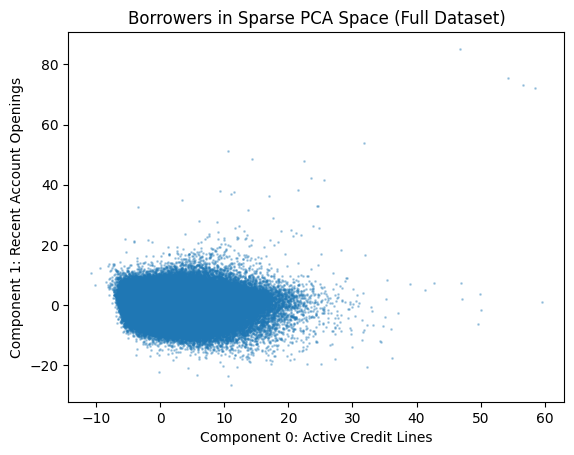

In [6]:
plt.scatter(X_full_sparse[:, 0], X_full_sparse[:, 1], s=1, alpha=0.3)
plt.xlabel('Component 0: Active Credit Lines')
plt.ylabel('Component 1: Recent Account Openings')
plt.title('Borrowers in Sparse PCA Space (Full Dataset)')
plt.show()

# Project : Borrower Risk Segmentation via Sparse PCA
#### Lending Club Accepted Loans (2007‑2018)

1. **Business Objective**

Identify latent risk profiles in Lending Club borrowers using unsupervised learning, providing actionable segments for underwriting, marketing, or product design.

2. **Dataset Overview**

Source: Lending Club “accepted loans” (2007‑Q4 2018)

Initial size: 2,260,701 rows × 151 columns

Final cleaned features: 134 numeric columns (after encoding, imputation, and scaling)

3. **Data Preparation Pipeline**

3.1. Handling Object‑Type Columns (38 columns)

Category	Columns	Transformation
Drop (18)	id, url, desc, emp_title, title, zip_code, verification_status_joint, sec_app_earliest_cr_line, hardship_type, hardship_reason, hardship_status, hardship_start_date, hardship_end_date, payment_plan_start_date, hardship_loan_status, debt_settlement_flag_date, settlement_status, settlement_date	Removed (unique IDs, free text, >50% nulls)
Binary (3)	pymnt_plan, hardship_flag, debt_settlement_flag	Mapped {'Y':1, 'N':0} or {'y':1, 'n':0}
Date (5)	issue_d, earliest_cr_line, last_pymnt_d, next_pymnt_d, last_credit_pull_d	Converted to datetime, extracted numeric features (year, month, time‑delta)
Categorical (2‑level) (4)	term, initial_list_status, application_type, disbursement_method	Label‑encoded to {0,1}
Categorical (multi‑level) (8)	grade, sub_grade, emp_length, home_ownership, verification_status, loan_status, purpose, addr_state	Ordinal mapping (where logical) or label‑encoding

3.2. Numeric Cleaning

Dropped numeric columns with >50% nulls (e.g., member_id, most hardship/settlement fields).

Filled remaining nulls (≤0.1% per column) with column median.

Feature scaling: Standardized all continuous features (StandardScaler); binary features left unscaled.

3.3. Final Pre‑PCA Dataset

Shape: 2,260,701 rows × 134 columns

Data types: float64 (continuous), int64 (binary/encoded)

Nulls: 0

Correlation: High multicollinearity expected (e.g., loan_amnt ↔ funded_amnt), addressed via sparse PCA.

4. **Dimensionality Reduction: Sparse PCA**

4.1. Why Sparse PCA?

Standard PCA yields dense components where every feature contributes, hindering interpretation.

Sparse PCA imposes an L₁ penalty (alpha), forcing many loadings to zero.

Result: each component is driven by a small subset of features, making business labeling straightforward.

4.2. Model Configuration

python
SparsePCA(
    n_components=10,
    alpha=10,          # sparsity regularization
    random_state=42,   # reproducibility
    max_iter=1000
)
Sample used for fitting: 200,000 rows (random sample, representative).

Explained variance (10 components): 40.3%
Lower than standard PCA due to sparsity constraint, but trade‑off accepted for interpretability.

4.3. Component Loadings & Sparsity

Component	Non‑zero loadings (out of 134)	Dominant features (top 3)
0	58	num_op_rev_tl, num_actv_rev_tl, num_rev_tl_bal_gt_0
1	70	num_tl_op_past_12m, acc_open_past_24mths, open_rv_12m
2	69	fico_range_high, fico_range_low, bc_util
3	63	total_il_high_credit_limit, total_bal_il, total_bal_ex_mort
4	72	out_prncp, out_prncp_inv, issue_year
5	74	loan_amnt, funded_amnt, funded_amnt_inv
6	14	sec_app_collections_12_mths_ex_med, sec_app_chargeoff_within_12_mths, sec_app_fico_range_low
7	51	delinq_2yrs, mths_since_last_delinq, mths_since_recent_revol_delinq
8	33	recoveries, collection_recovery_fee, loan_status
9	7	hardship_amount, hardship_payoff_balance_amount, orig_projected_additional_accrued_interest
Components 6 and 9 are notably sparse (<20 non‑zeros), highlighting focused risk signals.

5. **Component Interpretation & Labeling**

Component	Assigned Label	Business Meaning
0	Active Credit Lines	Count of active revolving accounts and balances >0.
1	Recent Account Openings	New accounts opened in the last 6‑24 months.
2	Credit Score vs. Utilization	Trade‑off between high FICO scores and high credit‑card/utilization rates.
3	Installment Loan Exposure	Total balances and limits on installment loans.
4	Loan Aging & Outstanding Principal	Loan vintage (issue year) and remaining unpaid principal.
5	Loan Size & Payment	Original loan amount, funded amount, and monthly installment.
6	Joint‑Application Risk	Features from the secondary applicant (co‑borrower) on joint applications.
7	Recent Delinquency History	Recency and frequency of delinquencies (last 24 months).
8	Recovery & Default Status	Post‑charge‑off recoveries and current loan‑status flags.
9	Hardship Program Involvement	Amounts and balances related to borrower hardship programs.

6. **Visualization**

6.1. Biplot (Components 0 & 1)

../data/biplot.png
Arrow direction and length indicate feature contribution to components. Gray points are borrowers (subsampled for clarity).

Key observations:

Component 0 (x‑axis) separates borrowers by number of active credit lines.

Component 1 (y‑axis) separates borrowers by recent account openings.

Features such as num_op_rev_tl and num_tl_op_past_12m dominate the respective components, confirming our labels.

6.2. Borrower Distribution in PCA Space

../data/scatter.png
*Borrowers colored by loan status (0=Good, 1=Risky, 2=Bad).*

Lower‑left quadrant: Borrowers with few active lines and few recent openings—likely low‑risk, established borrowers.

Upper‑right quadrant: Borrowers with many active lines and recent openings—potential credit‑seeking, higher‑risk segment.

7. **Business Insights & Recommendations**

Risk‑based segmentation
The 10 components provide a multi‑dimensional risk profile beyond a simple credit score. Lending Club could:

Create risk tiers combining component scores (e.g., high delinquency + high utilization = highest risk).

Adjust pricing or loan limits per tier.

Targeted interventions

Component 7 (delinquency history): Flag borrowers with high scores for early‑stage collection outreach.

Component 9 (hardship program): Identify borrowers likely to need hardship options early.

Product design

Component 6 (joint‑application risk): Develop specific underwriting rules for co‑signed loans.

Component 2 (credit‑score‑vs‑utilization): Offer credit‑line increase campaigns to high‑score, low‑utilization borrowers.

Model deployment

Sparse PCA components can be calculated in real‑time (linear projection) for new applicants.

Each component is interpretable, supporting regulatory compliance (no “black box”).

8. **Limitations & Next Steps**

Limitations
Explained variance: 40.3% is moderate; additional components could be added but would reduce sparsity.

Sample bias: Fitted on 200k‑row sample; transformation applied to full dataset assumes representativeness.

Linear assumption: PCA captures linear relationships; nonlinear patterns may remain in residuals.

Next Steps
Clustering: Apply K‑means to the 10 component scores to define discrete borrower groups.

Supervised validation: Regress component scores against actual default rates to validate risk ordering.

Time‑series analysis: Track how component scores evolve for borrowers over multiple loans.

Production pipeline: Automate the cleaning and projection steps for new loan applications.

9. **Technical Environment**

Language: Python 3.8

Libraries: pandas, numpy, scikit‑learn, matplotlib, seaborn

Notebook: Jupyter in VS Code

Repository: [GitHub link]

10. **Conclusion**

This project demonstrated a complete unsupervised learning workflow on a large, real‑world financial dataset. By applying Sparse PCA, we transformed 134 noisy features into 10 interpretable risk dimensions, each tied to clear business logic. The resulting segments provide a data‑driven foundation for risk assessment, customer targeting, and product strategy at Lending Club.